## Step 1 : Feature Extraction and organizing in a data frame

In [1]:
import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('images/Train_images/Sandstone_Versa0000.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data


In [2]:
#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

In [3]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
########################################

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [4]:
#Gerate OTHER FEATURES and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

# #VARIANCE with size=3
# variance_img = nd.generic_filter(img, np.var, size=3)
# variance_img1 = variance_img.reshape(-1)
# df['Variance s3'] = variance_img1  #Add column to original dataframe


######################################                

In [5]:
#Now, add a column in the data frame for the Labels i.e, the ground truth

#For this, we need to import the labeled image
labeled_img = cv2.imread('images/Train_masks/Sandstone_Versa0000.tif')
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print(df.head())

#df.to_csv("Gabor.csv")


#########################################################

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0               0       0       0       0       0       0       0       0   
1               0       0       0       0       0       0       0       0   
2               0       0       0       0       0       0       0       0   
3               0       0       0       0       0       0       0       0   
4               0       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Gabor32  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0       0       0  ...        0           0      0.0    0.0     0.0      0.0   
1       0       0  ...        0           0      0.0    0.0     0.0      0.0   
2       0       0  ...        0           0      0.0    0.0     0.0      0.0   
3       0       0  ...        0           0      0.0    0.0     0.0      0.0   
4       0       0  ...        0           0      0.0    0.0     0.0      0.0   

   Gaussian s3  Gaussian s7  Median s3  Labels  
0      

## Step 2 : Training ML Model

In [6]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

- `RandomForestRegressor` is for regression type of problems.

- For classification we use `RandomForestClassifier`.

Both yield similar results except for regressor the result is float and for classifier it is an integer, but here want the model to predict a label which is a distinct whole number hence we will be using classifier. 

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [8]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
#validation
prediction_test = model.predict(X_test)

from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(y_test,prediction_test))

Accuracy =  0.983170001127556


## Step 3 : Feature Ranking

Lets figure out which features most contributed to our model so that you optimize your model by picking those features predictions who matters the most.

In [11]:
importances = list(model.feature_importances_)
print(importances)

[0.040018238907766825, 0.0, 0.0, 0.008173349397518306, 0.13151544855508143, 0.06168833850757912, 0.07832362825757766, 0.06309731012346302, 0.09552147361699077, 0.0, 0.0, 0.016492286181307037, 0.05625248505400773, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000134956910386516, 0.01827893611797764, 0.021467106316799146, 0.03401207372986521, 0.0476783095626228, 0.0, 0.0, 3.420668637086212e-06, 6.3212248771177495e-06, 0.010026027328269429, 0.016292416892768013, 0.00955244851686133, 0.0030827654954678073, 0.0009983666889087632, 0.005991520462951064, 0.008853959029807568, 0.007321813117292988, 0.00928191002141279, 0.122165545824349, 0.035334227361438084, 0.09843531612801597]


In [12]:
#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Gabor4            0.131515
Gaussian s3       0.122166
Median s3         0.098435
Gabor8            0.095521
Gabor6            0.078324
Gabor7            0.063097
Gabor5            0.061688
Gabor12           0.056252
Gabor24           0.047678
Original Image    0.040018
Gaussian s7       0.035334
Gabor23           0.034012
Gabor22           0.021467
Gabor21           0.018279
Gabor11           0.016492
Gabor30           0.016292
Gabor29           0.010026
Gabor31           0.009552
Prewitt           0.009282
Sobel             0.008854
Gabor3            0.008173
Scharr            0.007322
Roberts           0.005992
Gabor32           0.003083
Canny Edge        0.000998
Gabor20           0.000135
Gabor28           0.000006
Gabor27           0.000003
Gabor14           0.000000
Gabor13           0.000000
Gabor16           0.000000
Gabor17           0.000000
Gabor10           0.000000
Gabor9            0.000000
Gabor18           0.000000
Gabor19           0.000000
Gabor25           0.000000
G

We can therefore choose the top 5 or 6 feature extracters in our model.

## Step 4 : Saving Training Model

In [13]:
import pickle

filename = 'sandstone_model'

pickle.dump(model,open(filename,'wb')) 
#save the model in a file names as in filename in writable binary form 

In [14]:
#loading the model

load_model = pickle.load(open(filename,'rb'))

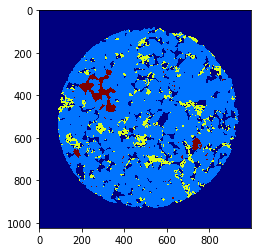

In [15]:
result = load_model.predict(X)

segmented = result.reshape((img.shape))

import matplotlib.pyplot as plt

plt.imshow(segmented, cmap = 'jet')
plt.imsave('segmented_rock.jpg',segmented,cmap = 'jet')

---

**SVM**

 - SVM will be slower than Random Forest. 

- Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.

In [ ]:
#Train the Linear SVM to compare against Random Forest

from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=100)  #Default of 100 is not converging

In [ ]:
# Train the model on training data
model.fit(X_train, y_train)

# verify number of trees used. If not defined above. 
#print('Number of Trees used : ', model.n_estimators)

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
#First test prediction on the training data itself. SHould be good. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

#.predict just takes the .predict_proba output and changes everything 
#to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
#In this example we have 4 labels, so the probabilities will for each label stored separately. 
# 
#prediction_prob_test = model.predict_proba(X_test)

#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))



#This part commented out for SVM testing. Uncomment for random forest. 
#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


#You can store the model for future use. In fact, this is how you do machine elarning
#Train on training images, validate on test images and deploy the model on unknown images. 

import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')